# Airbnb NYC Analysis

The objective of this project is to answer 3 key questions about Airbnbs in New York City. Specifically, as someone thinking of setting up one in the future, I'm interested in learning which configuration is likely to yield the most revenue:

1. Which neighbourhood(s) should I consider?
2. How many bedrooms & bathrooms?
3. Which review parameters are crucial (e.g. cleaniness, check-in)?
4. Should I buy an apartment in NYC?

**Potential Addtl. Scope**
Which keywords (in title, description, etc.) do I need to include?
How does this compare vs Denver? Which has better prospectives?

## Step 1 - Data Exploration
We'll kick off the analysis by playing around & exploring the data to have a better understanding of what data we have available.

For tasks #1 & #2, 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data/listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df.head()

C:\Users\nickb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190602163209,2019-06-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190602163209,2019-06-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190602163209,2019-06-03,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190602163209,2019-06-03,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.53
4,4989,https://www.airbnb.com/rooms/4989,20190602163209,2019-06-03,Great 1 bdrm. apartment in the PERFECT location!,Best location in NYC (the greatest city in the...,"Quiet, artsy, 1 bdrm. apt. in Hell's Kitchen (...",Best location in NYC (the greatest city in the...,none,"Hell's Kitchen is a safe, popular, and desirab...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24


In [2]:
# Dataset description
print(df.shape)
print(df.columns.values)

(48801, 106)
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'g

In [3]:
print(df.room_type.unique())
print(df.bed_type.unique())
print(df.amenities[0])

['Private room' 'Entire home/apt' 'Shared room']
['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
{TV,"Cable TV",Internet,Wifi,"Wheelchair accessible",Kitchen,"Free parking on premises",Elevator,"Free street parking","Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Keypad,"Outlet covers","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout"}


In [4]:
# Explore Amenities field
def clean_amenities(col, plot=True):
    amList = {}
    
    for row in col:
        rowList = row[1:-1].split(",")
        
        for item in rowList:
            item_proc = item[1:-1] if '"' in item else item
            
            if item_proc not in amList and item_proc != "":
                amList[item_proc] = 1
    
    return amList
        
amenities_unique = clean_amenities(df.amenities)

print(len(amenities_unique))
print("-------------")

for key in amenities_unique.keys():
    print(key)

130
-------------
TV
Cable TV
Internet
Wifi
Wheelchair accessible
Kitchen
Free parking on premises
Elevator
Free street parking
Buzzer/wireless intercom
Heating
Suitable for events
Washer
Dryer
Smoke detector
Carbon monoxide detector
First aid kit
Safety card
Fire extinguisher
Essentials
Shampoo
24-hour check-in
Hangers
Hair dryer
Iron
Laptop friendly workspace
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Self check-in
Keypad
Outlet covers
Hot water
Bed linens
Extra pillows and blankets
Microwave
Coffee maker
Refrigerator
Dishes and silverware
Cooking basics
Oven
Stove
Luggage dropoff allowed
Long term stays allowed
Cleaning before checkout
Air conditioning
Paid parking off premises
Indoor fireplace
Family/kid friendly
Lock on bedroom door
Private living room
Bathtub
Ethernet connection
Wide entrance for guests
Flat path to guest entrance
Well-lit path to entrance
No stairs or steps to enter
Pets allowed
Lockbox
High chair
Stair gates
Children’s

**Explore: Reviews**

Reviews are paramount for any Airbnb's success, so it's imperative to understand which ones have the greatest impact on bottom-line revenues. We'll start by understanding the __distribution & statistics__ for this dataset.

Specifically, these are:
* 'review_scores_rating'
* 'review_scores_accuracy'
* 'review_scores_cleanliness'
* 'review_scores_checkin'
* 'review_scores_communication'
* 'review_scores_location'
* 'review_scores_value'
* 'reviews_per_month'

In [5]:
# See if the variability in reviews is significant
reviewDF = df[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value']]

reviewDF.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,37665.000000,37682.000000,37646.000000,37670.000000,37643.000000,37643.000000
mean,9.624585,9.279789,9.751129,9.759915,9.558616,9.402332
std,0.822108,1.074310,0.697287,0.704628,0.759815,0.895349
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


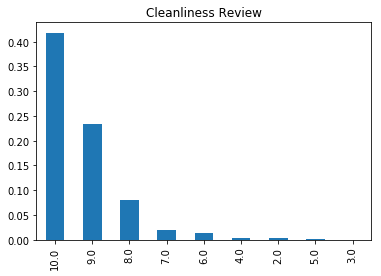

In [6]:
review_vals = reviewDF.review_scores_cleanliness.value_counts()

(review_vals/reviewDF.shape[0]).plot(kind="bar")
plt.title("Cleanliness Review");

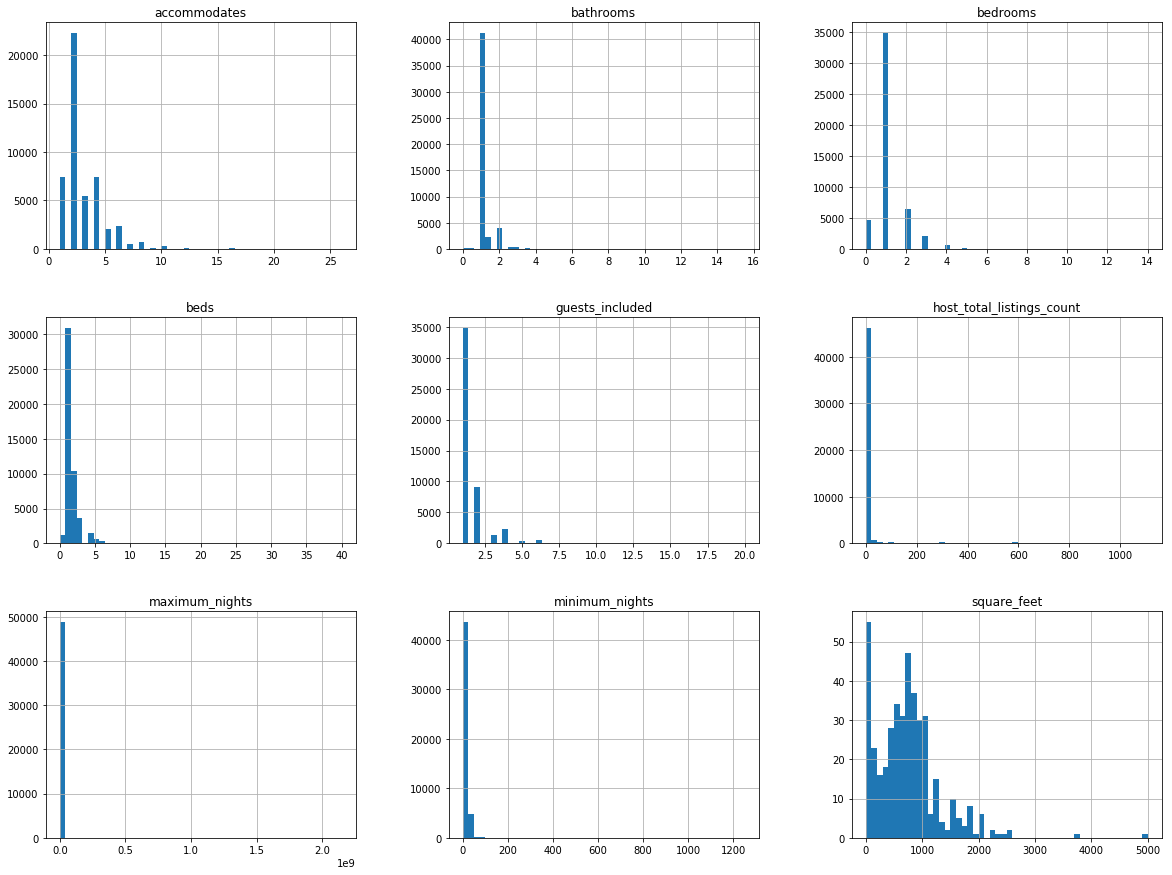

In [7]:
# Visualize quantitative variables
df_quant = df[['host_since', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
              'square_feet', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
              'maximum_nights']]

df_quant.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

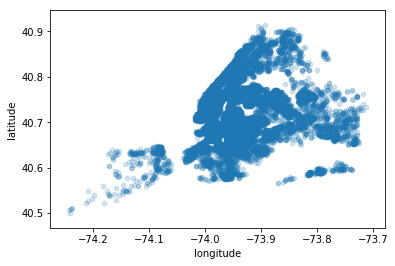

In [8]:
# Visualize scatterplot of coordinates
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

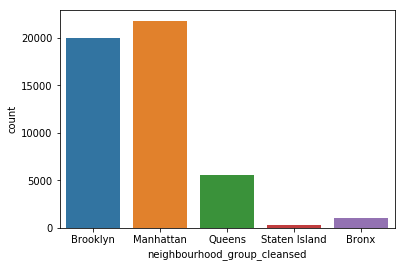

In [9]:
sns.countplot(x="neighbourhood_group_cleansed", data=df)

Harlem             2677
Upper West Side    2036
Hell's Kitchen     1963
East Village       1850
Upper East Side    1828
Name: neighbourhood_cleansed, dtype: int64


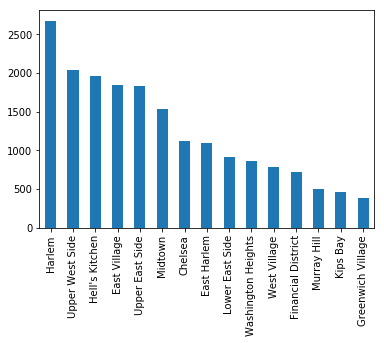

In [10]:
print(df[df['neighbourhood_group_cleansed'] == 'Manhattan']['neighbourhood_cleansed'].value_counts()[:5])
df[df['neighbourhood_group_cleansed'] == 'Manhattan']['neighbourhood_cleansed'].value_counts()[:15].plot(kind='bar')

Williamsburg          3944
Bedford-Stuyvesant    3708
Bushwick              2429
Crown Heights         1555
Greenpoint            1111
Name: neighbourhood_cleansed, dtype: int64


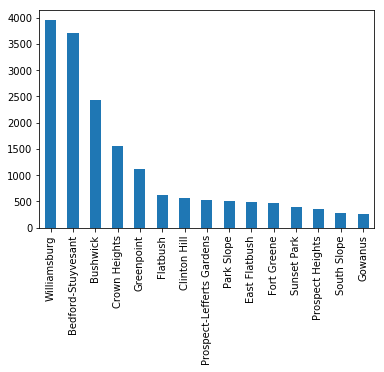

In [11]:
print(df[df['neighbourhood_group_cleansed'] == 'Brooklyn']['neighbourhood_cleansed'].value_counts()[:5])
df[df['neighbourhood_group_cleansed'] == 'Brooklyn']['neighbourhood_cleansed'].value_counts()[:15].plot(kind='bar')

Astoria             932
Long Island City    524
Flushing            435
Ridgewood           419
Sunnyside           330
Name: neighbourhood_cleansed, dtype: int64


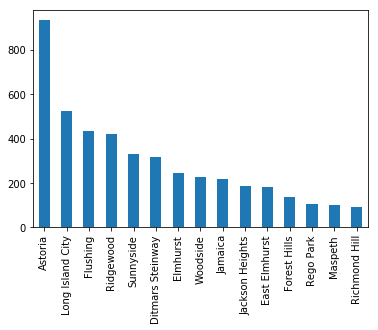

In [12]:
print(df[df['neighbourhood_group_cleansed'] == 'Queens']['neighbourhood_cleansed'].value_counts()[:5])
df[df['neighbourhood_group_cleansed'] == 'Queens']['neighbourhood_cleansed'].value_counts()[:15].plot(kind='bar')

In [13]:
# Import neighbourhoods dataset
df_nei = pd.read_csv('./data/neighbourhoods.csv')
df_nei[df_nei['neighbourhood_group'] == 'Queens']['neighbourhood'].unique()

array(['Arverne', 'Astoria', 'Bayside', 'Bayswater', 'Bay Terrace',
       'Belle Harbor', 'Bellerose', 'Breezy Point', 'Briarwood',
       'Cambria Heights', 'College Point', 'Corona', 'Ditmars Steinway',
       'Douglaston', 'East Elmhurst', 'Edgemere', 'Elmhurst',
       'Far Rockaway', 'Flushing', 'Forest Hills', 'Fresh Meadows',
       'Glendale', 'Glen Oaks', 'Hollis', 'Hollis Hills', 'Holliswood',
       'Howard Beach', 'Jackson Heights', 'Jamaica', 'Jamaica Estates',
       'Jamaica Hills', 'Kew Gardens', 'Kew Gardens Hills', 'Laurelton',
       'Little Neck', 'Long Island City', 'Maspeth', 'Middle Village',
       'Neponsit', 'Ozone Park', 'Queens Village', 'Rego Park',
       'Richmond Hill', 'Ridgewood', 'Rockaway Beach', 'Rosedale',
       'South Ozone Park', 'Springfield Gardens', 'St. Albans',
       'Sunnyside', 'Whitestone', 'Woodhaven', 'Woodside'], dtype=object)

## Step 2 - Data Wrangling

Here, we will be cleansing & pre-processing the data to use as training/testing data for the Linear Regression model. We will:
1. Analyze which columns are relevant & non-relevant (the latter which we will drop)
2. Data formatting (no "unnecessary" strings that should be #s)
3. Treat missing data (drop if response is NaN, and either drop/impute variables)
4. Process categorical variables (dummy or numerical encoding)
5. Split into X & y

In [14]:
# Drop columns irrelevant for any of the analyses (based on reasoning & domain knowledge)
drop_list = [
    'listing_url',
    'scrape_id',
    'last_scraped',
    'experiences_offered',
    'transit',
    'notes',
    'host_about',
    'host_location',
    'host_acceptance_rate',
    'host_neighbourhood',
    'host_listings_count',
    'host_verifications',
    'street',
    'neighbourhood',
    'zipcode',
    'market',
    'is_location_exact',
    'smart_location',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calendar_updated',
    'has_availability',
    'is_location_exact',
    'availability_30',
    'availability_60',
    'availability_90',
    'calendar_last_scraped',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'thumbnail_url',
    'medium_url',
    'picture_url',
    'xl_picture_url',
    'host_since',
    'host_id',
    'host_url',
    'host_name',
    'host_thumbnail_url',
    'host_picture_url',
    'host_has_profile_pic',
    'host_identity_verified',
    'city',
    'state',
    'country_code',
    'country',
    'latitude',
    'longitude',
    'requires_license',
    'license',
    'jurisdiction_names',
    'instant_bookable',
    'is_business_travel_ready',
    'cancellation_policy',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]

df_dropd = df.drop(drop_list, axis=1)

print(df_dropd.shape)
print(df_dropd.columns.values)

(48801, 44)
['id' 'name' 'summary' 'space' 'description' 'neighborhood_overview'
 'access' 'interaction' 'house_rules' 'host_response_time'
 'host_response_rate' 'host_is_superhost' 'host_total_listings_count'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'amenities' 'square_feet' 'price' 'weekly_price' 'monthly_price'
 'security_deposit' 'cleaning_fee' 'guests_included' 'extra_people'
 'minimum_nights' 'maximum_nights' 'availability_365' 'first_review'
 'last_review' 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'reviews_per_month']


### Step 2A - Generate Price Prediction Dataset
Generate a subset of the filtered DF to the likely variables for daily price. Since this is an analysis to help us determine the best "siting" for the Airbnb, we can ignore cumulative "social proof" effects.

**Key assumptions:**
* Ignore weekly/monthly discounts
* Ignore qualitative factors (e.g. description keywords, image quality & type)
* Ignore reviews

**Quantitative variables:**
* host_since
* host_is_superhost
* host_total_listings_count
* accommodates
* bathrooms
* bedrooms
* beds
* square_feet
* security_deposit
* cleaning_fee
* guests_included
* extra_people
* minimum_nights
* maximum_nights

**Categorical variables:**
* neighbourhood_cleansed
* neighbourhood_group_cleansed
* property_type
* room_type
* bed_type
* amenities

**Response:** price

In [15]:
# Build price prediction dataset

# Drop descriptive & other small-impact variables
pri_dropList = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'access', 'interaction',
 'house_rules', 'host_response_time', 'host_response_rate', 'first_review', 'last_review', 'reviews_per_month']
df_price = df_dropd.drop(pri_dropList, axis=1)

# ignore weekly & monthly prices for this analysis
df_price.drop(['weekly_price', 'monthly_price'], axis=1, inplace=True)

#drop id, since this is an aggregate analysis
# df_price.drop(['id'], axis=1, inplace=True)

print(df_price.shape)
print(df_price.columns.values)

df_price.head()

(48801, 29)
['id' 'host_is_superhost' 'host_total_listings_count'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'amenities' 'square_feet' 'price' 'security_deposit' 'cleaning_fee'
 'guests_included' 'extra_people' 'minimum_nights' 'maximum_nights'
 'availability_365' 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value']


,id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,maximum_nights,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2539,f,6.0,Kensington,Brooklyn,Apartment,Private room,2,1.0,1.0,...,1,730,365,98.0,10.0,10.0,10.0,10.0,10.0,10.0
1,2595,f,5.0,Midtown,Manhattan,Apartment,Entire home/apt,2,1.0,0.0,...,1,1125,331,95.0,9.0,9.0,10.0,10.0,10.0,9.0
2,3647,f,1.0,Harlem,Manhattan,Apartment,Private room,2,1.0,1.0,...,3,7,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3831,f,1.0,Clinton Hill,Brooklyn,Guest suite,Entire home/apt,3,1.0,1.0,...,1,730,182,90.0,10.0,9.0,10.0,10.0,10.0,9.0
4,4989,f,1.0,Hell's Kitchen,Manhattan,Apartment,Entire home/apt,2,1.0,1.0,...,4,90,83,89.0,9.0,9.0,10.0,10.0,10.0,9.0


### 2B - Formatting Issues

Resolve any formatting issues that would prevent model from working (e.g. strings when they should be #s). I've identified multiple "$"-based columns expressed as strings, whereas they should be interpreted as #s by model.

In [16]:
df_price['price'].head()

0    $149.00
1    $225.00
2    $150.00
3     $89.00
4    $105.00
Name: price, dtype: object

In [17]:
#Treat fields with "$" issue
df_price['price_num'] = df_price['price'].str[1:].str.replace(',', '').astype(float)
df_price['security_deposit_n'] = df_price['security_deposit'].str[1:].str.replace(',', '').astype(float)
df_price['cleaning_fee_n'] = df_price['cleaning_fee'].str[1:].str.replace(',', '').astype(float)
df_price['extra_people_n'] = df_price['extra_people'].str[1:].str.replace(',', '').astype(float)

### 2C - Missing Variables

Explore & treat missing variables by either
1. Dropping (if most are NaN)
2. Imputing (Mean, Mode, 0 - whichever makes most sense for the variable)

In [18]:
# Treat missing quantitative variables
print(df_price[[
'host_is_superhost',
'host_total_listings_count',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'square_feet',
'security_deposit',
'cleaning_fee',
'guests_included',
'extra_people',
'minimum_nights',
'maximum_nights']].describe())

# Spot severely missing values (> 90%)
print("90% Missing:")
print(df_price.columns[df_price.isnull().mean() >= 0.9].values)

# Spot other "significant" missing parameters (> 20%)
print("20% Missing:")
print(df_price.columns[df_price.isnull().mean() >= 0.2].values)

# Identify threshold for other potential missing variables (> 1%)
print("Any Missing:")
print(df_price.columns[df_price.isnull().mean() > 0].values)

# Identify parameters with NO missing values
print("No Missing:")
print(df_price.columns[df_price.isnull().mean() == 0].values)

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               48788.000000  48801.000000  48741.000000  48775.000000   
mean                   14.079364      2.860700      1.147822      1.177078   
std                    82.480128      1.891141      0.434920      0.754663   
min                     0.000000      1.000000      0.000000      0.000000   
25%                     1.000000      2.000000      1.000000      1.000000   
50%                     1.000000      2.000000      1.000000      1.000000   
75%                     2.000000      4.000000      1.000000      1.000000   
max                  1108.000000     26.000000     15.500000     14.000000   

               beds  square_feet  guests_included  minimum_nights  \
count  48759.000000   418.000000     48801.000000    48801.000000   
mean       1.544576   709.322967         1.524252        7.092764   
std        1.113359   566.955362         1.160903       20.392511   
min        0.000000  

In [19]:
# Explore low missing variables
df_price[df_price['host_total_listings_count'].isnull() == True]

,id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_num,security_deposit_n,cleaning_fee_n,extra_people_n
3792,2262357,NaN,NaN,Sunnyside,Queens,Apartment,Entire home/apt,2,1.0,1.0,...,10.0,10.0,9.0,9.0,10.0,9.0,120.0,200.0,65.0,0.0
6147,4446862,NaN,NaN,Crown Heights,Brooklyn,Apartment,Private room,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,0.0
6658,4763327,NaN,NaN,Greenpoint,Brooklyn,Apartment,Entire home/apt,4,1.0,1.0,...,8.0,10.0,10.0,8.0,10.0,8.0,195.0,295.0,70.0,25.0
8365,6360224,NaN,NaN,Bushwick,Brooklyn,Apartment,Private room,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,0.0
9260,6992973,NaN,NaN,Williamsburg,Brooklyn,Apartment,Entire home/apt,4,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,1000.0,75.0,50.0
9339,7048398,NaN,NaN,Upper West Side,Manhattan,Apartment,Entire home/apt,5,1.0,1.0,...,9.0,8.0,9.0,9.0,10.0,9.0,245.0,NaN,150.0,25.0
9952,7556587,NaN,NaN,Harlem,Manhattan,Apartment,Private room,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,10.0
14872,11553543,NaN,NaN,Ditmars Steinway,Queens,Bed and breakfast,Private room,1,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,45.0,NaN,15.0,20.0
32704,24857291,NaN,NaN,Flushing,Queens,Apartment,Private room,2,1.0,1.0,...,8.0,7.0,8.0,10.0,10.0,8.0,60.0,NaN,NaN,10.0
32716,24868956,NaN,NaN,Flushing,Queens,Condominium,Private room,2,1.0,1.0,...,8.0,8.0,9.0,9.0,9.0,8.0,60.0,NaN,NaN,10.0


In [20]:
# Wrangle data based on missing data observations

# Drop 'square_feet' because > 90% is missing
df_price.drop(['square_feet'], axis=1, inplace=True)

# Drop rows with empty host info (only 13 rows, and too much info missing to impute)
# df_price.dropna(subset=['host_since'])
sh_map = {'f': 0, 't': 1}
df_price['host_is_superhost'].replace(sh_map, inplace=True) # Safe to assume that no entry means not superhost (only 13 missing)

#OK to mean-impute
df_price['bedrooms'].fillna(df_price['bedrooms'].mean(), inplace=True) # 26 missing, tend to be entire place/private rooms
df_price['beds'].fillna(df_price['beds'].mean(), inplace=True) # 42 missing, descriptions don't indicate no beds (most likely a data entry issue?)
df_price['review_scores_rating'].fillna(df_price['review_scores_rating'].mean(), inplace=True)
df_price['review_scores_accuracy'].fillna(df_price['review_scores_accuracy'].mean(), inplace=True)
df_price['review_scores_cleanliness'].fillna(df_price['review_scores_cleanliness'].mean(), inplace=True)
df_price['review_scores_checkin'].fillna(df_price['review_scores_checkin'].mean(), inplace=True)
df_price['review_scores_communication'].fillna(df_price['review_scores_communication'].mean(), inplace=True)
df_price['review_scores_location'].fillna(df_price['review_scores_location'].mean(), inplace=True)
df_price['review_scores_value'].fillna(df_price['review_scores_value'].mean(), inplace=True)
df_price['host_total_listings_count'].fillna(df_price['host_total_listings_count'].mean(), inplace=True)

# OK to "= 0" (since it does provide useful info), and low enough % to make assumption
df_price['security_deposit'].fillna(0, inplace=True)
df_price['cleaning_fee'].fillna(0, inplace=True)
df_price['security_deposit_n'].fillna(0, inplace=True)
df_price['cleaning_fee_n'].fillna(0, inplace=True)
df_price['bathrooms'].fillna(0, inplace=True) # 60 missing, but unsure (from description or other variables, whether it would have bathrooms. Better to be conservative)
df_price['host_is_superhost'].fillna(0, inplace=True)

In [21]:
# Verify no missing values in Categoricals

print(df_price['neighbourhood_cleansed'].isnull().mean())
print(df_price['neighbourhood_group_cleansed'].isnull().mean())
print(df_price['property_type'].isnull().mean())
print(df_price['room_type'].isnull().mean())
print(df_price['bed_type'].isnull().mean())
print(df_price['amenities'].isnull().mean())

0.0
0.0
0.0
0.0
0.0
0.0


In [22]:
# Column checkpoint (there should be 1 less from the earlier drop)

print(df_price.columns[df_price.isnull().mean() == 0].values)
print(df_price.shape)

['id' 'host_is_superhost' 'host_total_listings_count'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'amenities' 'price' 'security_deposit' 'cleaning_fee' 'guests_included'
 'extra_people' 'minimum_nights' 'maximum_nights' 'availability_365'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'price_num' 'security_deposit_n' 'cleaning_fee_n'
 'extra_people_n']
(48801, 32)


### 2D - Categorical Variables

Now that we've treated all missing variables in our dataset, time to pre-process our categoricals to feed into the model.

In [23]:
# Dummyfy categorical variables
cat_cols = ['neighbourhood_cleansed',
            'neighbourhood_group_cleansed',
            'property_type',
            'room_type',
            'bed_type']

for col in cat_cols:
#     if col != 'neighbourhood_cleansed':
    df_price = pd.concat([df_price.drop(col, axis=1), pd.get_dummies(df_price[col], prefix=col, drop_first=True)], axis=1)

In [24]:
print(df_price.columns[df_price.isnull().mean() == 0].values)
print(df_price.shape)

['id' 'host_is_superhost' 'host_total_listings_count' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'amenities' 'price' 'security_deposit'
 'cleaning_fee' 'guests_included' 'extra_people' 'minimum_nights'
 'maximum_nights' 'availability_365' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'price_num'
 'security_deposit_n' 'cleaning_fee_n' 'extra_people_n'
 'neighbourhood_cleansed_Arden Heights' 'neighbourhood_cleansed_Arrochar'
 'neighbourhood_cleansed_Arverne' 'neighbourhood_cleansed_Astoria'
 'neighbourhood_cleansed_Bath Beach'
 'neighbourhood_cleansed_Battery Park City'
 'neighbourhood_cleansed_Bay Ridge' 'neighbourhood_cleansed_Bay Terrace'
 'neighbourhood_cleansed_Bay Terrace, Staten Island'
 'neighbourhood_cleansed_Baychester' 'neighbourhood_cleansed_Bayside'
 'neighbourhood_cleansed_Bayswater'
 'neighbourhood_cleansed_Bedford-Stuyvesant'
 'neighbour

In [25]:
# 'Amenities' Pre-processing (decided to drop due to overwhelming complexity. It's > 100 unique values!)

# Pre-process 'amenities' column (to remove curlys)
# df_price['amenities_proc'] = df_price.amenities.str[1:-1]

# Convert Amenities_proc --> dummy variable (optional)
# df_price = pd.concat([df_price.drop('amenities_proc', axis=1), df_price['amenities_proc'].str.get_dummies(sep=',')])

df_price.drop(['amenities'],axis=1, inplace=True)

### Metric

After more thought, I think the prediction variable should capture bottom-line performance - that is, the annual revenue the Airbnb generates.

A simplification of this is multiplying:

**Revenue = [Avg daily price] x [365 - Days Available]**

The biggest assumption we're making here is that "Days Available" is the average availability of an Airbnb unit. 

In [26]:
booked_df = pd.read_csv('mBookRates.csv')
booked_df.drop('Unnamed: 0', axis=1, inplace=True)
print(booked_df.head())
booked_df.shape

   listing_id   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  \
0        2454   0.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1        2515   8.0   0.0   0.0   0.0   0.0   0.0  17.0  21.0  17.0  20.0   
2        2539   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   
3        2595   0.0   0.0   0.0   5.0  13.0  21.0   0.0   0.0  12.0  10.0   
4        3330  22.0  27.0  24.0  26.0   0.0   0.0  23.0  19.0  16.0  28.0   

   11.0  12.0  
0   0.0   0.0  
1  19.0  23.0  
2   0.0   0.0  
3   6.0  14.0  
4  27.0  15.0  


(81528, 13)

In [27]:
df_exRev = df_price.merge(booked_df, how='left', left_on=['id'], right_on=['listing_id']).drop(['listing_id'], axis=1)
df_exRev.rename(columns={'1.0': 'Jan', '2.0': 'Feb', '3.0': 'Mar', '4.0': 'Apr', '5.0': 'May', '6.0': 'Jun', '7.0': 'Jul', '8.0': 'Aug', '9.0': 'Sep', '10.0': 'Oct', '11.0': 'Nov', '12.0': 'Dec'}, inplace=True)
df_exRev['annual_booked'] = df_exRev['Jan'] + df_exRev['Feb'] + df_exRev['Mar'] + df_exRev['Apr'] + df_exRev['May'] + df_exRev['Jun'] + df_exRev['Jul'] + df_exRev['Aug'] + df_exRev['Sep'] + df_exRev['Oct'] + df_exRev['Nov'] + df_exRev['Dec']
df_exRev.drop(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis=1, inplace=True)
df_exRev.head()

,id,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,annual_booked
0,2539,0.0,6.0,2,1.0,1.0,1.0,$149.00,$100.00,$25.00,...,0,0,0,1,0,0,0,0,1,5.0
1,2595,0.0,5.0,2,1.0,0.0,1.0,$225.00,$350.00,$100.00,...,0,0,0,0,0,0,0,0,1,81.0
2,3647,0.0,1.0,2,1.0,1.0,1.0,$150.00,$200.00,$75.00,...,0,0,0,1,0,0,0,1,0,0.0
3,3831,0.0,1.0,3,1.0,1.0,4.0,$89.00,$500.00,0,...,0,0,0,0,0,0,0,0,1,299.0
4,4989,0.0,1.0,2,1.0,1.0,2.0,$105.00,0,$25.00,...,0,0,0,0,0,0,0,0,1,104.0


In [28]:
# Create Expected Revenue column
df_exRev['revenue'] = df_exRev['price_num'] * df_exRev['annual_booked']

# Create Average Daily Revenue column
df_exRev['daily_rev'] = df_exRev['revenue']/365

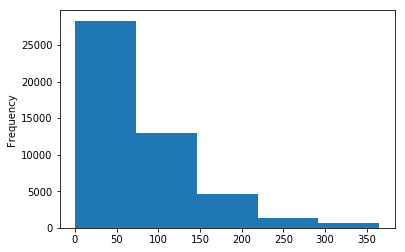

In [29]:
df_exRev.daily_rev.plot(kind='hist', bins=range(0,366,73))

## Step 3 - Modeling
Now that we have a complete dataset, we will perform the modelling, by following these steps:
1. Split data (into training & test datasets)
2. Instantiate & train model
3. Test model
4. Score
5. Use model to answer questions (using predict, coefficients)

In [30]:
#Remove columns for X
X_drops = ['id', 'price', 'price_num', 'revenue', 'daily_rev', 'security_deposit', 'cleaning_fee', 'extra_people', 'availability_365']

X = df_exRev.drop(X_drops, axis=1)
y = df_exRev['daily_rev']

# ['host_is_superhost', 'host_total_listings_count', 'accommodates',
#  'bathrooms', 'bedrooms', 'beds', 'guests_included', 'availability_365',
#  'review_scores_rating', 'review_scores_accuracy',
#  'review_scores_cleanliness', 'review_scores_checkin',
#  'review_scores_communication', 'review_scores_location',
#  'review_scores_value', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
#  'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
#  'security_deposit_n', 'cleaning_fee_n', 'extra_people_n']

# Xdrop2 = ['guests_included', 'availability_365',
#  'security_deposit_n', 'cleaning_fee_n', 'extra_people_n']

# X = X.drop(Xdrop2, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X.to_csv('model_X.csv', index=False)
y.to_csv('model_y.csv', index=False)

C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [31]:
# Check status of shape & variables involved.
print(X.shape)
print(X.columns.values)

(48801, 284)
['host_is_superhost' 'host_total_listings_count' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'guests_included' 'minimum_nights'
 'maximum_nights' 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'security_deposit_n' 'cleaning_fee_n'
 'extra_people_n' 'neighbourhood_cleansed_Arden Heights'
 'neighbourhood_cleansed_Arrochar' 'neighbourhood_cleansed_Arverne'
 'neighbourhood_cleansed_Astoria' 'neighbourhood_cleansed_Bath Beach'
 'neighbourhood_cleansed_Battery Park City'
 'neighbourhood_cleansed_Bay Ridge' 'neighbourhood_cleansed_Bay Terrace'
 'neighbourhood_cleansed_Bay Terrace, Staten Island'
 'neighbourhood_cleansed_Baychester' 'neighbourhood_cleansed_Bayside'
 'neighbourhood_cleansed_Bayswater'
 'neighbourhood_cleansed_Bedford-Stuyvesant'
 'neighbourhood_cleansed_Belle Harbor' 'neighbourhood_cleansed_Bellerose'
 'neighbourhood_cleansed_Belmon

In [32]:
# Get Linear model up & running...

# Instantiate & train
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Predict testing data
pred_train = lm_model.predict(X_train)
pred_test = lm_model.predict(X_test)

# Score
train_score = r2_score(y_train, pred_train)
test_score = r2_score(y_test, pred_test)

print(train_score)
print(test_score)

0.2559366870637816
0.20190768506366452


In [33]:
# # Get Polynomial model up & running...

# poly_feat = PolynomialFeatures(degree=3)
# X_poly_train = poly_feat.fit_transform(X_train)
# X_poly_test = poly_feat.fit_transform(X_test)

# poly_model = LinearRegression().fit(X_poly_train, y_train)

# # Predict testing data
# pred_train_poly = poly_model.predict(X_poly_train)
# pred_test_poly = poly_model.predict(X_poly_test)

# # Score
# train_score_poly = r2_score(y_train, pred_train_poly)
# test_score_poly = r2_score(y_test, pred_test_poly)

# print(train_score_poly)
# print(test_score_poly)

**Highest R2 Score from all tested models!**

I tried fitting various different regressional models (i.e. Lasso, Ridge, SGD), but none had better scores than the simple Linear Regression model above.

Though I am unsure whether this r2_score is considered low in predicting expected Airbnb revenue, some factors negatively influencing it could be:
* Relatively small-to-medium-sized dataset (~50k points)
* Complex & social nature of deciding on booking a listing (description, image, specific trip requirements)

In [34]:
print("Average Nightly Prices:")
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Queens'] == 1]['price_num'].mean(),2))
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Brooklyn'] == 1]['price_num'].mean(),2))
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Manhattan'] == 1]['price_num'].mean(),2))

print('----------------')
print("Average Daily Revenue:")
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Queens'] == 1]['daily_rev'].mean(),2))
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Brooklyn'] == 1]['daily_rev'].mean(),2))
print(round(df_exRev[df_exRev['neighbourhood_group_cleansed_Manhattan'] == 1]['daily_rev'].mean(),2))

Average Nightly Prices:
98.27
124.18
197.52
----------------
Average Daily Revenue:
46.0
75.18
107.04


In [35]:
X.head()

,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,review_scores_rating,...,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,annual_booked
0,0.0,6.0,2,1.0,1.0,1.0,1,1,730,98.000000,...,0,0,0,1,0,0,0,0,1,5.0
1,0.0,5.0,2,1.0,0.0,1.0,2,1,1125,95.000000,...,0,0,0,0,0,0,0,0,1,81.0
2,0.0,1.0,2,1.0,1.0,1.0,2,3,7,93.939368,...,0,0,0,1,0,0,0,1,0,0.0
3,0.0,1.0,3,1.0,1.0,4.0,1,1,730,90.000000,...,0,0,0,0,0,0,0,0,1,299.0
4,0.0,1.0,2,1.0,1.0,2.0,1,4,90,89.000000,...,0,0,0,0,0,0,0,0,1,104.0


In [36]:
X['extra_people_n'].mean()

14.328251470256758

In [37]:
# Import prediction input
df_nei_Manhattan_EV = pd.read_csv('./data/input/pred_input_Manhattan_EV.csv')
df_nei_Manhattan_HA = pd.read_csv('./data/input/pred_input_Manhattan_HA.csv')
df_nei_Manhattan_HK = pd.read_csv('./data/input/pred_input_Manhattan_HK.csv')
df_nei_Manhattan_UWS = pd.read_csv('./data/input/pred_input_Manhattan_UWS.csv')

df_nei_Brooklyn_BS = pd.read_csv('./data/input/pred_input_Brooklyn_BS.csv')
df_nei_Brooklyn_BU = pd.read_csv('./data/input/pred_input_Brooklyn_BU.csv')
df_nei_Brooklyn_WI = pd.read_csv('./data/input/pred_input_Brooklyn_WI.csv')

df_nei_Queens_AS = pd.read_csv('./data/input/pred_input_Queens_AS.csv')
df_nei_Queens_LI = pd.read_csv('./data/input/pred_input_Queens_LI.csv')

avgRev_Manhattan_EV = round(lm_model.predict(df_nei_Manhattan_EV)[0],2)
avgRev_Manhattan_HA = round(lm_model.predict(df_nei_Manhattan_HA)[0],2)
avgRev_Manhattan_HK = round(lm_model.predict(df_nei_Manhattan_HK)[0],2)
avgRev_Manhattan_UWS = round(lm_model.predict(df_nei_Manhattan_UWS)[0],2)

avgRev_Brooklyn_BS = round(lm_model.predict(df_nei_Brooklyn_BS)[0],2)
avgRev_Brooklyn_BU = round(lm_model.predict(df_nei_Brooklyn_BU)[0],2)
avgRev_Brooklyn_WI = round(lm_model.predict(df_nei_Brooklyn_WI)[0],2)

avgRev_Queens_AS = round(lm_model.predict(df_nei_Queens_AS)[0],2)
avgRev_Queens_LI = round(lm_model.predict(df_nei_Queens_LI)[0],2)

print("--------Manhattan---------")
print(avgRev_Manhattan_EV)
print(avgRev_Manhattan_HA)
print(avgRev_Manhattan_HK)
print(avgRev_Manhattan_UWS)
print("")
print("--------Brooklyn---------")
print(avgRev_Brooklyn_BS)
print(avgRev_Brooklyn_BU)
print(avgRev_Brooklyn_WI)
print("")
print("--------Queens---------")
print(avgRev_Queens_AS)
print(avgRev_Queens_LI)

--------Manhattan---------
45.34
13.45
45.4
47.37

--------Brooklyn---------
0.35
-3.54
22.78

--------Queens---------
23.9
13.55


### Which Neighbourhood is best?
Based on the above analysis, **owning an Airbnb in Manhattan will give me the best average revenue**, relative to the other 2 popular neighbourhood groups in NYC. Interestingly, an Airbnb in Queens is expected to have __net losses__ in revenue (so definitely not a great idea there!).

Naturally, Manhattan is the hotspot destination for all travel & business guests, and its location enables unmatchable advantages in both (a) price, and (b) days booked in a year. The only foreseeable downside would be the higher costs associated with the property, and they would have to be accounted for to determine the "best" neighbourhood.

For the purposes of this analysis, I'm going to take an 80-20 approach and use estimates (from online research) on the expected mortgage (and O&M, if possible) costs for these regions. Naturally, the "net cash flow" will be negative (due to not incorporating the positive valuations associated with owning the property), so we'll just see which one is "least negative".

In a more fullsome analysis, I'd develop my own views in the trajectory of the housing market, and expected growth for a given financing life.

### What configuration is best?
Intestingly, the # of bathrooms seems to be a key determinant of performance (I would have thought bedrooms would be the heavier driver), with expected revenues more than x2 when you have a 2-bed, 2-bath configuration.

The conclusion here would be - "if possible, try getting a 2-bedroom with 2-bathroom", and if not just go with a 1-bed 1-bathroom unit.

In [38]:
# Import prediction input
df_nei_1_1 = pd.read_csv('./data/input/pred_input_Manhattan_EV.csv')
df_nei_2_2 = pd.read_csv('./data/input/pred_input_Manhattan_EV_2bed_2_bath.csv')
df_nei_2_1 = pd.read_csv('./data/input/pred_input_Manhattan_EV_2bed_1_bath.csv')

avgRev_1_1 = lm_model.predict(df_nei_1_1)[0]
avgRev_2_2 = lm_model.predict(df_nei_2_2)[0]
avgRev_2_1 = lm_model.predict(df_nei_2_1)[0]

print(round(avgRev_1_1,2))
print(round(avgRev_2_2,2))
print(round(avgRev_2_1,2))

45.34
89.26
47.74


In [39]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    
    reviewFlds = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']
    
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df[coefs_df.est_int.isin(reviewFlds)]

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
print(coef_df)

                        est_int     coefs  abs_coefs
11    review_scores_cleanliness  3.548366   3.548366
15          review_scores_value -2.830832   2.830832
12        review_scores_checkin -1.456493   1.456493
14       review_scores_location  1.254608   1.254608
13  review_scores_communication -0.508354   0.508354
10       review_scores_accuracy -0.303972   0.303972


### Rating Components
From the coefficients above, we can see that the importance of the rating components are as below (bassed on absolute value coefficients):
1. Check In (5.3)
2. Value (4.4)
3. Location (4.3)
4. Communication (3.0)
5. Accuracy (2.0)
6. Cleanliness (0.3)

Although a bit surprised by how relatively little impact **cleanliness** had on annual revenue performance, the results do make sense. While the first 4 factors are more "basic" in nature (i.e. getting what you paid for, with no issues with the act of 'staying'), cleanliness is a nice-to-have, in relative terms. 

When someone is comparing 2 similar listings in the other 4 categories, cleanliness is likely to be the "tie-breaker". Therefore, it is crucial to treat is as a key requirement (it's also not THAT hard to keep a house squeaky clean...!), once you fulfill the basics (listing information, check-in logistics, support).

### Should I invest in an Airbnb in NYC?

From the first question, we learned that listings on Harlem tend to do better on average than Brooklyn ($\$$43/day in Harlem vs $\$$14/day in Brooklyn). We can discount Astoria, Queens as it projected an average "negative revenue".

Based on THIS, I was able to get an estimate of the average total cost of a 1-bedroom in both regions, as well as their corresponding mortgages (see bottom for assumptions).

**Average Costs:**
1. Williamsburg, Brooklyn
  * Total Cost: \$978k
  * Mortgage: $\$$4,819/mo ($\$$57,828/year)

2. Harlem, Manhattan
  * Total Cost: \$704k
  * Mortgage: $\$$3,499/mo ($\$$41,988/year)

We can conclude that while 1 bedrooms in Harlem cost -28\% less than those in Williamsburg, they tend to generate significantly more revenue on average (almost x3). **Therefore, from the candidate options studied (Williamsburg, Harlem, and Astoria), we are best off with purchasing a 1-bedroom in Harlem, Manhattan.**

**Mortgage Assumptions:**
- Financing Life: 30 years, fixed
- Interest: 4.49%
- Down Payment: 20%

All Mortgage Calculations were made using this handy online calculator: https://www.trulia.com/mortgage-payment-calculator/

### Closing Thoughts
It is important to note that this is far from being a fullsome analysis that would yield a more conclusive result. Specifically, the following should be considered to further this analysis:
1. **Modelling Accuracy** - We should experiment with more configurations for the linear regression model as well as experiment with other, more complex models (e.g. Polynomial, Neural Networks, Random Forests).
2. **Customer & Market Research** - Better understand the guest segment(s) and NYC's market, particularly as the NYC Airbnb market is quite constrained by the heavy regulations for short-term rentals in NYC.
3. **More Analysis** - Test & experiment more sub-regions within the 3 candidate neighbourhood groups (Manhattan, Brooklyn, Queens)